In [109]:
using Genie, DCAUtils, JLD2, LinearAlgebra, Statistics
using LsqFit, PyPlot, StatsBase
include("../src/entropy.jl")

CIE (generic function with 1 method)

In [57]:
dbd_msa  = read_fasta_alignment("../../Gen.jl/data/alignments/natural/DBD_alignment.uniref90.cov80.a2m", 0.9);
@load "../../data_Genie/pars_dbd.jld2"
@load "../../data_Genie/short_trajDBD1_fortimes.jld2"

1-element Vector{Symbol}:
 :step_msa

In [58]:
L, M = size(step_msa[1]); T = length(step_msa);
step_msa_rs = zeros(T, L, M);
for m in 1:M
    step_msa_rs[m, :, :] = step_msa[m]
end

In [59]:
f1,f2 = compute_weighted_frequencies(dbd_msa, 22, 0.2);
f1 = reshape(f1, (21,76));
f1_0,f2_0 = compute_weighted_frequencies(step_msa[1], 22, 0.2);
f1_0 = reshape(f1_0, (21,76));
p1 = zeros(M, 21, L)
for idx in 1:M
    for a in 1:21
        for i in 1:L
            p1[idx,:,i] = single_site_prob_cond(i,step_msa[1][:,idx],h_dbd,J_dbd, 76)
        end
    end
end

p1_0 = mean(p1, dims = 1)[1,:,:];
scores = (f1 .- p1_0) ./ (f1 .- f1_0);

freqs = zeros(T, 21, L);
for i in 1:T
    freqs[i, :, :] = reshape(compute_weighted_frequencies(step_msa[i], 22, 0.)[1], (21,L))
end

θ = 0.2 threshold = 15.0
M = 24944 N = 76 Meff = 3129.1468140631705
θ = 0.2 threshold = 15.0
M = 1000 N = 76 Meff = 1000.0
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff 

Excessive output truncated after 524295 bytes.

θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0
M = 1000 N = 76 Meff = 1000
θ = 0.0 threshold = 0.0


In [74]:
cor(f1[:], f1_0[:])

-0.01348430803524839

In [75]:
times = zeros(21,L)
prefac = zeros(21,L)
x = [i for i in 1:T]
for a in 1:21
    for i in 1:76
        model(t, p) = p[1] *(1 .- exp.(-t/p[2]))
        p0 = [0.5, 0.5]
        fit = curve_fit(model, x, freqs[:,a,i], p0);
        prefac[a,i] = fit.param[1]
        times[a,i] = fit.param[2]
    end
end

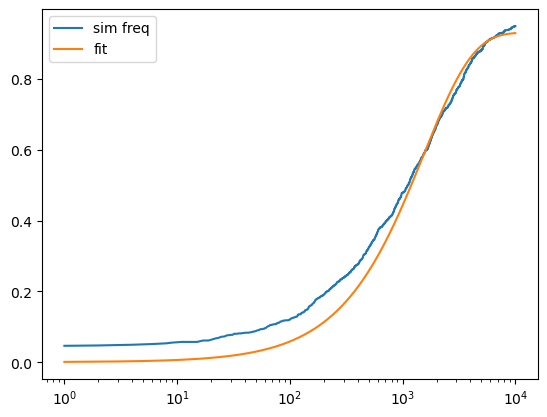

PyObject <matplotlib.legend.Legend object at 0x7f47b49e83a0>

In [113]:
aa = 2; site = 1;
x = [i for i in 1:T]
plt.plot(x, freqs[:,aa,site], label = "sim freq")
plt.plot(x, prefac[aa,site] .* (1 .- exp.(.-x ./times[aa,site])), label = "fit")
plt.xscale("log")
plt.legend()

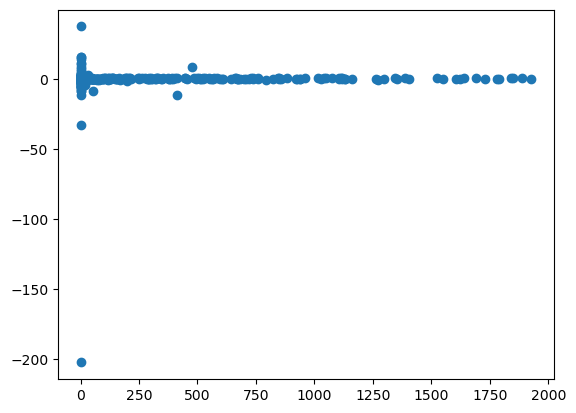

0.00833623299416569

In [87]:
plt.scatter(times[:], scores[:])
cor(scores[:], times[:])

0.8834586466165414


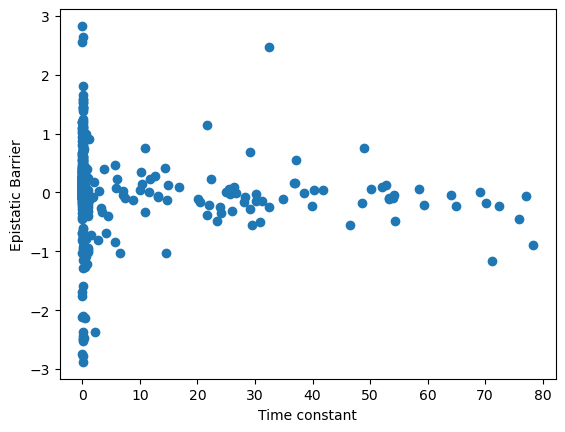

-0.1147317344393695

In [125]:

idx = (times .< 80) .& ((scores.*scores) .< 10)
plt.scatter(times[idx], scores[idx])
plt.ylabel("Epistatic Barrier")
plt.xlabel("Time constant")
println(sum(idx)/(21*76)) 
cor(scores[idx], log.(times[idx]))

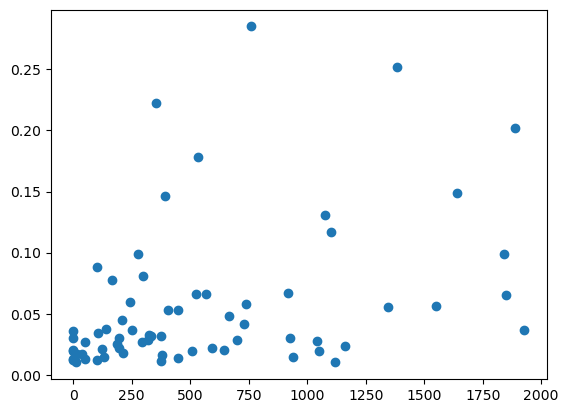

0.4364673956421103

In [111]:
num = f1 .- p1_0
idx = (f1_0 .< 0.05) .& (f1 .> 0.05) .& (num .> 0.01)
plt.scatter(times[idx], num[idx])
corspearman(num[idx], times[idx])

In [112]:
idx

21×76 BitMatrix:
 0  0  0  0  0  0  0  1  0  0  0  0  0  …  0  0  0  0  0  1  0  0  0  0  0  0
 1  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0  …  1  0  0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0